In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [14]:
print("Loading California Housing dataset...")
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['MEDV'] = california_housing.target  # Target variable
print("Dataset shape:", df.shape)
df.head()

Loading California Housing dataset...
Dataset shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (16512, 8)
Test shape: (4128, 8)


In [5]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [6]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [7]:
print(f"\nMean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 0.26
R-squared Score: 0.81


/tmp/ipykernel_7976/1125534522.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="viridis")


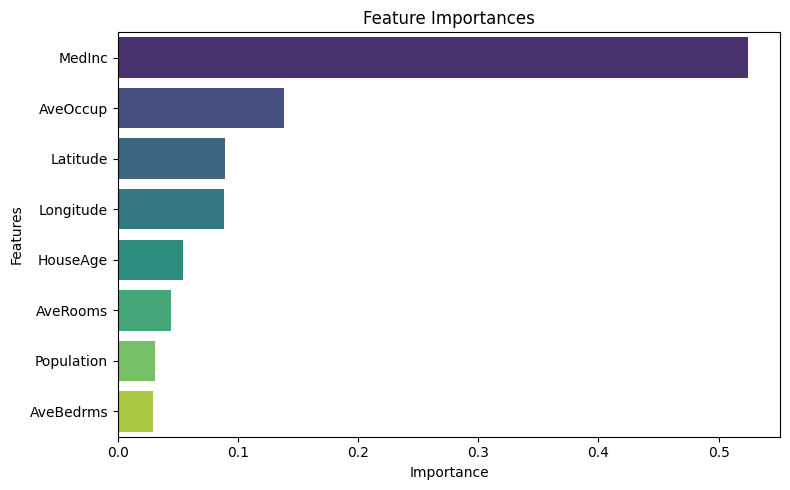

In [8]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="viridis")
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [9]:
single_data = X_test.iloc[0].values.reshape(1, -1)
predicted_value = rf.predict(single_data)[0]
actual_value = y_test.iloc[0]

/home/naim/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [10]:
print(f"\nSample Features: {X_test.iloc[0].to_dict()}")
print(f"Predicted Value: {predicted_value:.2f}")
print(f"Actual Value: {actual_value:.2f}")



Sample Features: {'MedInc': 1.6812, 'HouseAge': 25.0, 'AveRooms': 4.192200557103064, 'AveBedrms': 1.0222841225626742, 'Population': 1392.0, 'AveOccup': 3.8774373259052926, 'Latitude': 36.06, 'Longitude': -119.01}
Predicted Value: 0.51
Actual Value: 0.48


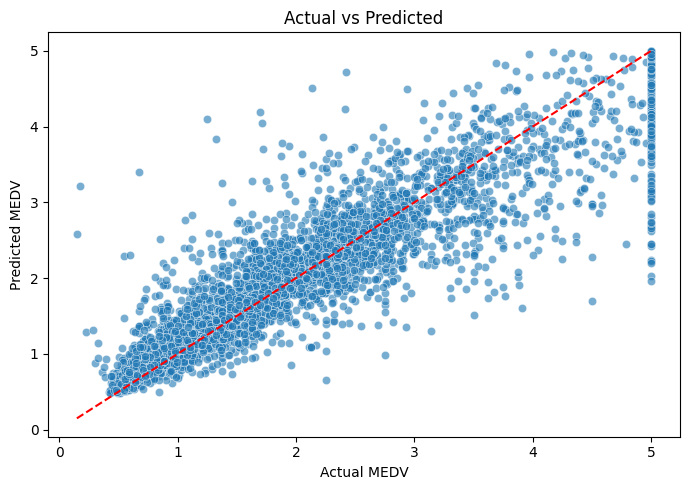

In [11]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.tight_layout()
plt.show()

In [12]:
oob_errors = []
tree_counts = range(50, 251, 50)

print("\nCalculating OOB error for different numbers of trees...")
for n in tree_counts:
    rf_temp = RandomForestRegressor(
        n_estimators=n,
        random_state=42,
        n_jobs=-1,
        bootstrap=True,
        oob_score=True
    )
    rf_temp.fit(X_train, y_train)
    oob_error = mean_squared_error(y_train, rf_temp.oob_prediction_)
    oob_errors.append(oob_error)


Calculating OOB error for different numbers of trees...


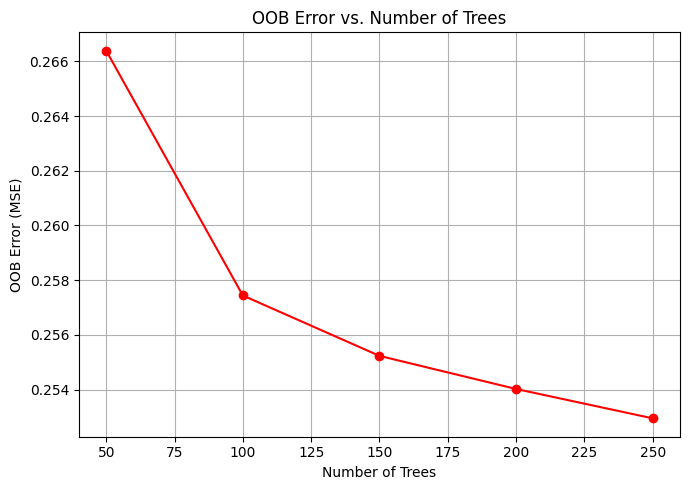

In [13]:
plt.figure(figsize=(7, 5))
plt.plot(tree_counts, oob_errors, marker='o', color='red')
plt.title("OOB Error vs. Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error (MSE)")
plt.grid(True)
plt.tight_layout()
plt.show()